A. Data Loading and Overview

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Load dataset
df = pd.read_csv('/content/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


B. Data Exploration

In [ ]:
# Data info and structure
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


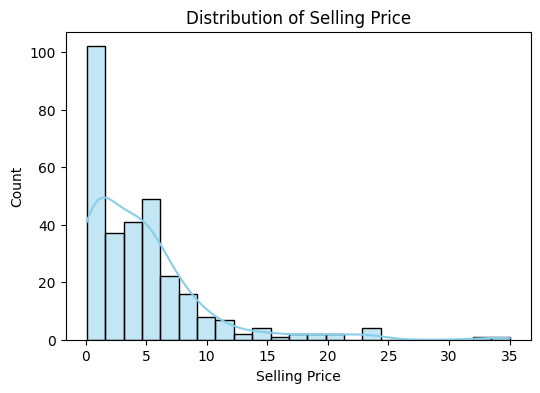

In [ ]:
#Plot Distribution of Selling Price
plt.figure(figsize=(6, 4))
sns.histplot(df['Selling_Price'], kde=True, color='skyblue')
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Count')
plt.show()

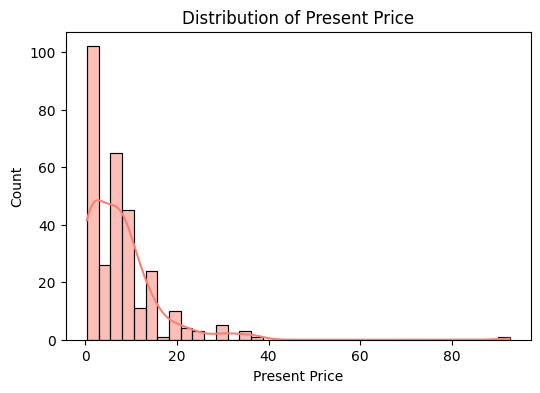

In [ ]:
# Plot Distribution of Present Price
plt.figure(figsize=(6, 4))
sns.histplot(df['Present_Price'], kde=True, color='salmon')
plt.title('Distribution of Present Price')
plt.xlabel('Present Price')
plt.ylabel('Count')
plt.show()


C. Feature Engineering

In [ ]:
# Create new column 'Car_Age'
df['Car_Age'] = 2020 - df['Year']
df.drop(['Car_Name', 'Year'], axis=1, inplace=True)

In [ ]:
# One-hot encode categorical features
df = pd.get_dummies(df, drop_first=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,False,True,False,True
1,4.75,9.54,43000,0,7,True,False,False,True
2,7.25,9.85,6900,0,3,False,True,False,True
3,2.85,4.15,5200,0,9,False,True,False,True
4,4.60,6.87,42450,0,6,True,False,False,True


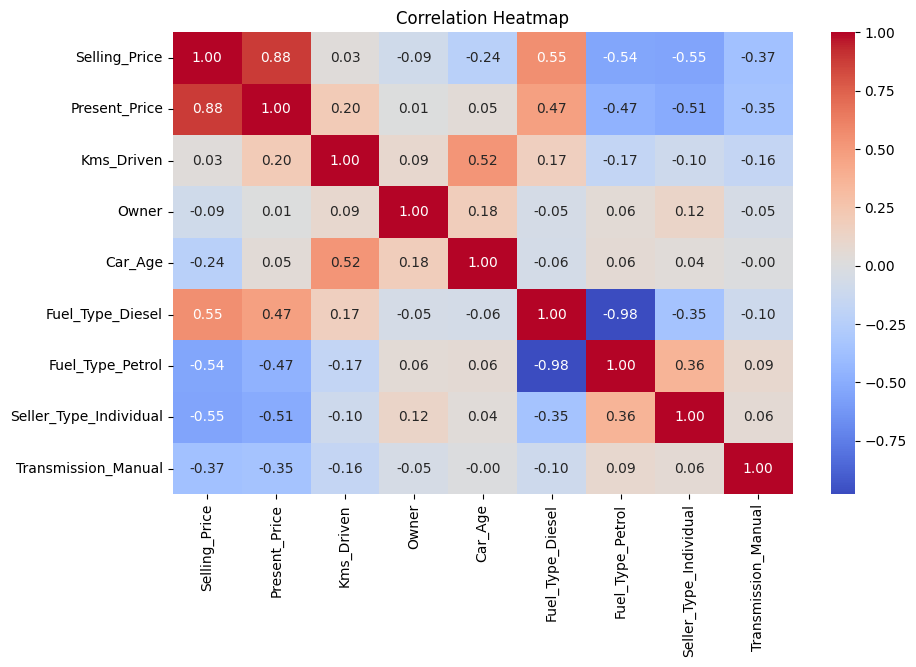

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

D. Model Preparation

In [ ]:
# Define features and target
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

E. Linear Regression

In [ ]:
#fitting
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


Linear Regression R2: 0.8489813024899079
MAE: 1.2162256821297006
RMSE: 1.8651552135513745


F. Lasso Regression

In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("Lasso Regression R2:", r2_score(y_test, y_pred_lasso))
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))


Lasso Regression R2: 0.8489597180672691
MAE: 1.2102897953934468
RMSE: 1.865288497908538


G. Random Forest Regressor

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest R2:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest R2: 0.9599938850484411
MAE: 0.63872131147541
RMSE: 0.9599813760147025


I. Visualization

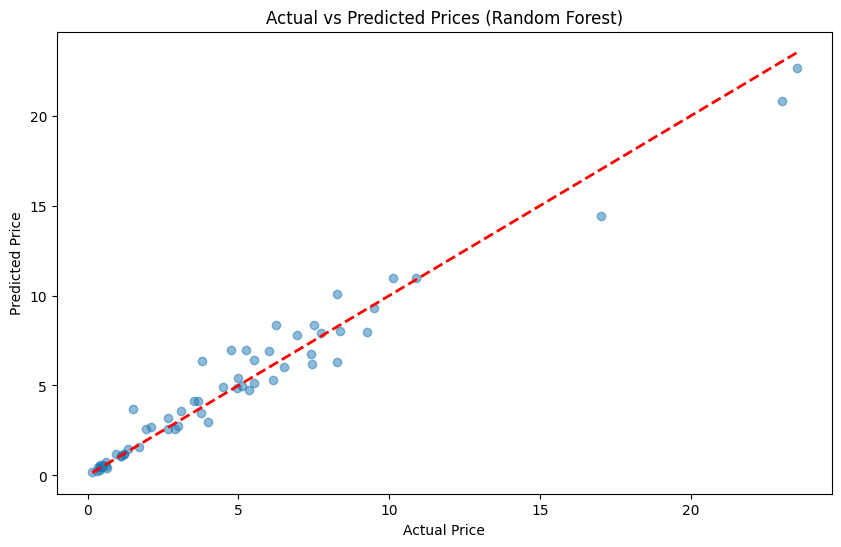

In [ ]:
# Actual vs Predicted plot for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5) # Changed rf_pred to y_pred_rf
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (Random Forest)')
plt.savefig('actual_vs_predicted.png')
plt.show()

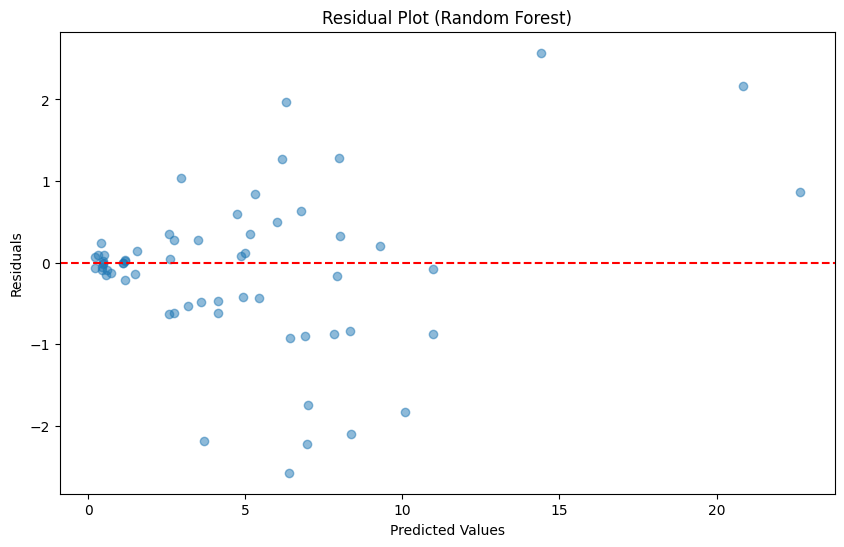

In [ ]:
# Residual plot for Random Forest
residuals = y_test - y_pred_rf # Changed rf_pred to y_pred_rf
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals, alpha=0.5) # Changed rf_pred to y_pred_rf
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Random Forest)')
plt.axhline(y=0, color='r', linestyle='--')
plt.savefig('residual_plot.png')  # Save for presentation
plt.show()